In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
df = pd.read_csv('/Users/moiz/Desktop/IntrotoAI/cleaned_data.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,1.702691,83.07447,28.529842,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.600000,68.04000,26.570000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.570000,63.50000,25.610000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.650000,63.50000,23.300000,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.570000,53.98000,21.770000,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


/Users/moiz/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     83889
           1       0.50      0.19      0.28      5138

    accuracy                           0.94     89027
   macro avg       0.72      0.59      0.62     89027
weighted avg       0.93      0.94      0.93     89027


Performance Metrics:
Accuracy: 0.942
Precision: 0.926
Recall: 0.942
F1 Score: 0.930


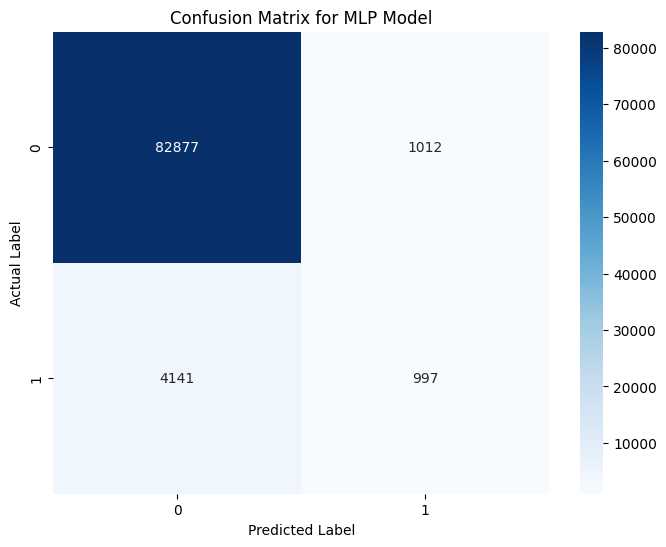

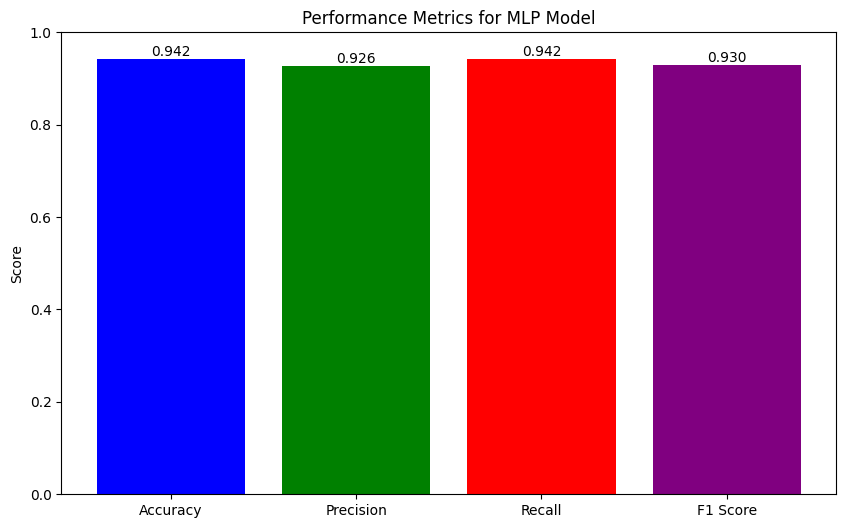

In [6]:

# Define all features
numeric_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'HeightInMeters']
categorical_features = ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
                        'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
                        'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 
                        'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
                        'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
                        'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 
                        'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 
                        'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
target = 'HadHeartAttack'

# Prepare the features
X = df[numeric_features + categorical_features].copy()
y = df[target].copy()


# Encode categorical variables
le = LabelEncoder()
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

# Encode the target variable
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', 
                          solver='adam', alpha=0.0001, 
                          max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for MLP Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot individual metric bars
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'green', 'red', 'purple'])
plt.title('Performance Metrics for MLP Model')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
plt.ylim(0, 1)
plt.show()